SOMATIVA IABD 2024 - ALANA DE FRANÇA SILVA, CSTADS124N2

In [141]:
# Importando Bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

Preparação dos dados

In [142]:
# importando a base de dados

df = pd.read_csv('dadosacoes.csv')

In [143]:
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


Exploração dos dados

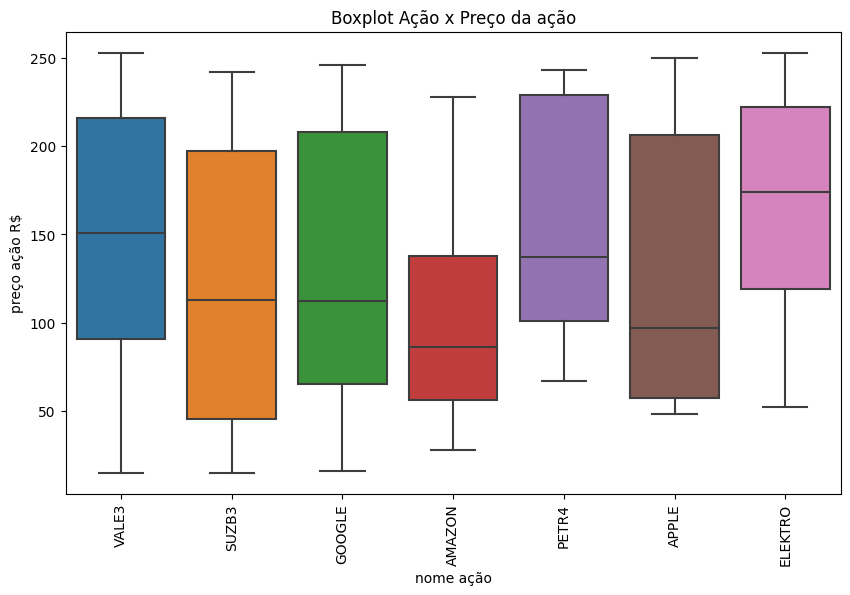

In [144]:
# Plotando boxplot do preço da ação para cada ativo
plt.figure(figsize=(10, 6))
sns.boxplot(x='nome ação', y='preço ação R$', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot Ação x Preço da ação')
plt.show()
#plt.savefig('Boxplot_Acao_x_Preco_da_acao.png')

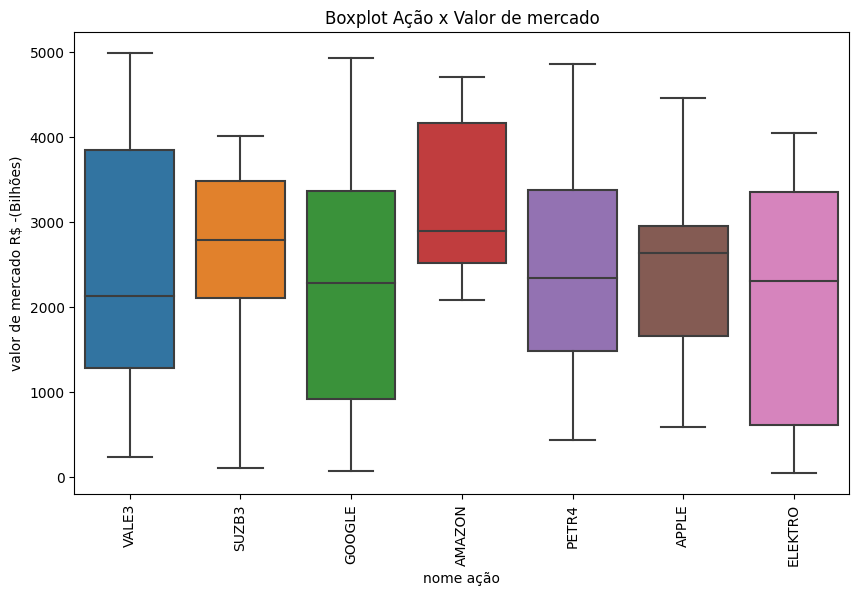

In [145]:
# Plotando boxplot do valor de mercado da empresa para cada ativo
plt.figure(figsize=(10, 6))
sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot Ação x Valor de mercado')
plt.show()
#plt.savefig('Boxplot_Acao_x_Valor_de_mercado.jpg')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [147]:
df.describe 

<bound method NDFrame.describe of    nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0      VALE3            194          45                            2134
1      SUZB3             91          71                            3069
2      SUZB3            165          41                            2815
3      SUZB3             56          34                            3613
4     GOOGLE            212           9                            2975
..       ...            ...         ...                             ...
95     SUZB3            208          78                            3035
96     VALE3            253          60                            3263
97    GOOGLE             99          35                             980
98     VALE3             82          43                            1866
99     VALE3            111          19                             230

[100 rows x 4 columns]>

Pré processamento dos dados

In [148]:
df.isnull().sum() # verificando se tem valores que sao nulos

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [149]:
df.isna().sum() # verificando se tem valores que não são numeros

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [150]:
# Transformar a coluna 'nome ação' em variáveis binárias (True/False)
df_codificado = pd.get_dummies(df, columns=['nome ação'], drop_first=True)

# Exibir resultado do DataFrame
df_codificado.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False


In [151]:
# Selecionando apenas as colunas numéricas para normalizar
col_n = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

# Normalização dos dados com StandardScaler
scaler = StandardScaler()
df_normalizados = scaler.fit_transform(col_n)

# Convertendo os dados normalizados de volta para DataFrame
df_normalizados = pd.DataFrame(df_normalizados, columns=col_n.columns)

# Verificando os dados normalizados
df_normalizados.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,0.772901,-0.256419,-0.215567
1,-0.602986,0.694636,0.456955
2,0.385515,-0.402735,0.274259
3,-1.070520,-0.658788,0.848240
4,1.013347,-1.573264,0.389343


In [152]:
# K-means com 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df_normalizados['cluster_4'] = kmeans_4.fit_predict(df_normalizados)

# Exibindo os primeiros resultados para verificar os clusters
print(df_normalizados.head())

   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  cluster_4
0       0.772901   -0.256419                       -0.215567          0
1      -0.602986    0.694636                        0.456955          3
2       0.385515   -0.402735                        0.274259          2
3      -1.070520   -0.658788                        0.848240          2
4       1.013347   -1.573264                        0.389343          2


c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
0      VALE3            194          45                            2134   
1      SUZB3             91          71                            3069   
2      SUZB3            165          41                            2815   
3      SUZB3             56          34                            3613   
4     GOOGLE            212           9                            2975   
..       ...            ...         ...                             ...   
95     SUZB3            208          78                            3035   
96     VALE3            253          60                            3263   
97    GOOGLE             99          35                             980   
98     VALE3             82          43                            1866   
99     VALE3            111          19                             230   

    cluster_4  
0           0  
1           3  
2           2  
3           2  
4           2  
.. 

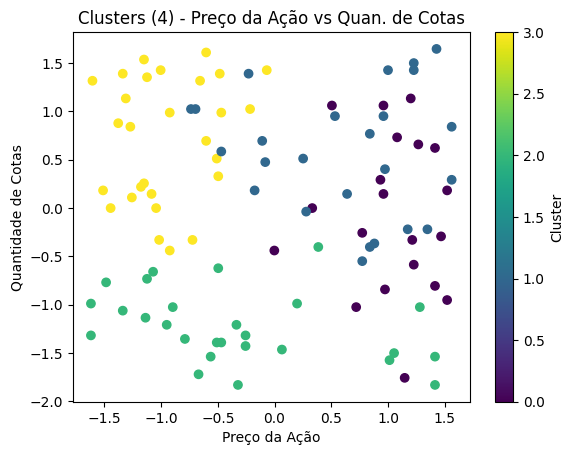

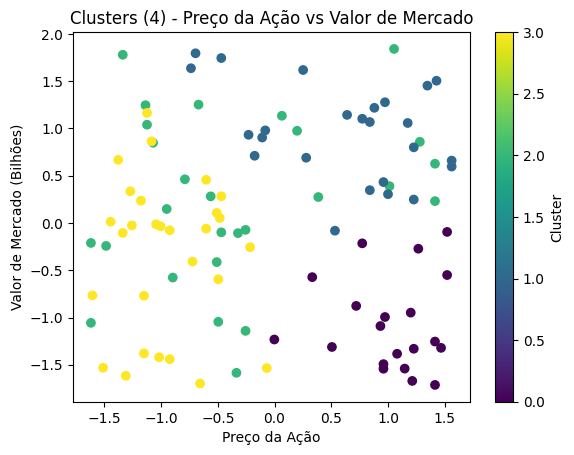

In [153]:
# Adicionando os clusters ao DataFrame original para visualização completa
df['cluster_4'] = df_normalizados['cluster_4']

# Exibindo o DataFrame com a coluna de clusters
print(df[['nome ação', 'preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)', 'cluster_4']])

# Visualizando os clusters em um gráfico (2D)
plt.scatter(df_normalizados['preço ação R$'], df_normalizados['qtde cotas'], c=df_normalizados['cluster_4'], cmap='viridis')
plt.xlabel('Preço da Ação')
plt.ylabel('Quantidade de Cotas')
plt.title('Clusters (4) - Preço da Ação vs Quan. de Cotas')
plt.colorbar(label='Cluster')
plt.show()

# Visualizando os clusters em um gráfico (2D)
plt.scatter(df_normalizados['preço ação R$'], df_normalizados['valor de mercado R$ -(Bilhões)'], c=df_normalizados['cluster_4'], cmap='viridis')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.title('Clusters (4) - Preço da Ação vs Valor de Mercado')
plt.colorbar(label='Cluster')
plt.show()


c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  cluster_4  \
0       0.772901   -0.256419                       -0.215567          0   
1      -0.602986    0.694636                        0.456955          3   
2       0.385515   -0.402735                        0.274259          2   
3      -1.070520   -0.658788                        0.848240          2   
4       1.013347   -1.573264                        0.389343          2   

   cluster_5  
0          1  
1          0  
2          3  
3          2  
4          3  
   nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
0      VALE3            194          45                            2134   
1      SUZB3             91          71                            3069   
2      SUZB3            165          41                            2815   
3      SUZB3             56          34                            3613   
4     GOOGLE            212           9                            2975   
..       

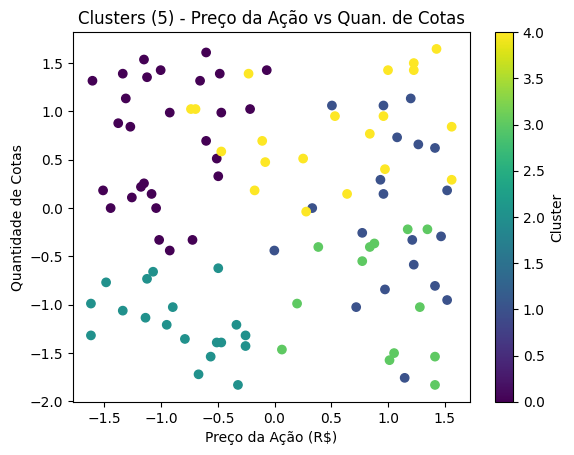

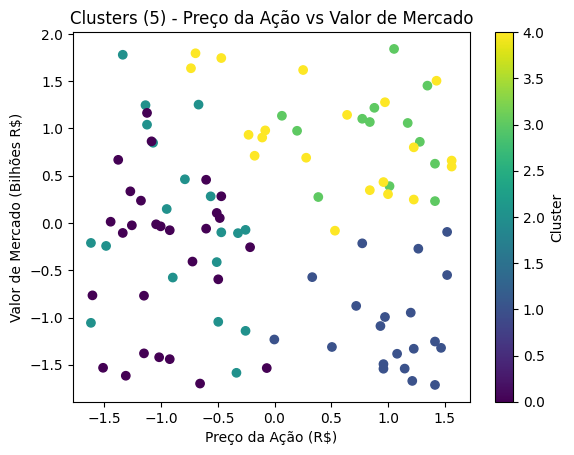

In [154]:
# Aplicando o algoritmo K-means com n_clusters = 5
kmeans = KMeans(n_clusters=5, random_state=42)
df_normalizados['cluster_5'] = kmeans.fit_predict(df_normalizados)

# Exibindo os primeiros resultados para verificar os clusters
print(df_normalizados.head())

# Adicionando os clusters ao DataFrame original para visualização completa
df['cluster_5'] = df_normalizados['cluster_5']

# Exibindo o DataFrame com a coluna de clusters
print(df[['nome ação', 'preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)', 'cluster_5']])

# Visualizando os clusters em um gráfico (Preço da Ação vs Quantidade de Cotas)
plt.scatter(df_normalizados['preço ação R$'], df_normalizados['qtde cotas'], c=df_normalizados['cluster_5'], cmap='viridis')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Quantidade de Cotas')
plt.title('Clusters (5) - Preço da Ação vs Quan. de Cotas')
plt.colorbar(label='Cluster')
plt.show()

# Visualizando os clusters em um gráfico (Preço da Ação vs Valor de Mercado)
plt.scatter(df_normalizados['preço ação R$'], df_normalizados['valor de mercado R$ -(Bilhões)'], c=df_normalizados['cluster_5'], cmap='viridis')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões R$)')
plt.title('Clusters (5) - Preço da Ação vs Valor de Mercado')
plt.colorbar(label='Cluster')
plt.show()

   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  cluster_4  \
0       0.772901   -0.256419                       -0.215567          0   
1      -0.602986    0.694636                        0.456955          3   
2       0.385515   -0.402735                        0.274259          2   
3      -1.070520   -0.658788                        0.848240          2   
4       1.013347   -1.573264                        0.389343          2   

   cluster_5  cluster_8  
0          1          2  
1          0          1  
2          3          0  
3          2          6  
4          3          0  
   nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
0      VALE3            194          45                            2134   
1      SUZB3             91          71                            3069   
2      SUZB3            165          41                            2815   
3      SUZB3             56          34                            3613   
4     GOOGLE      

c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


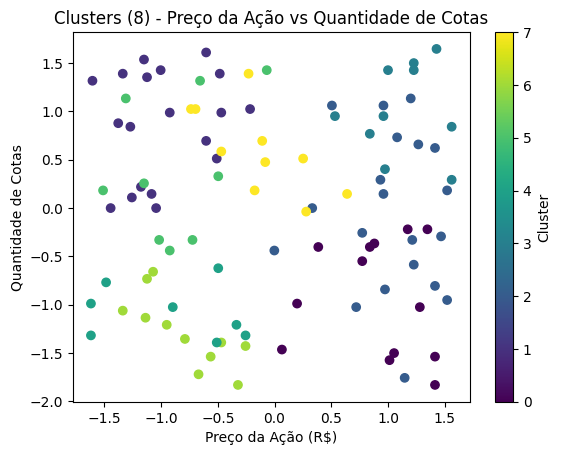

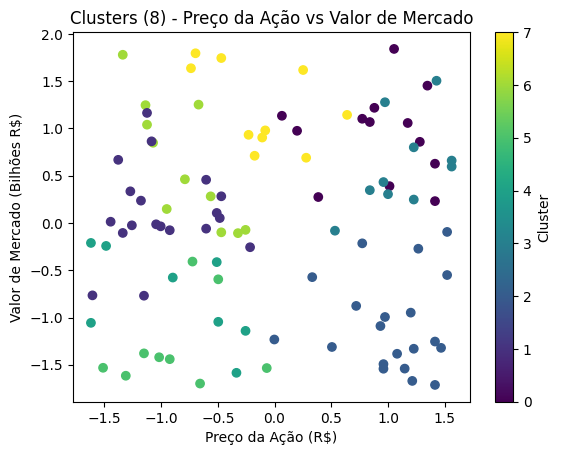

In [155]:
# Aplicando o algoritmo K-means com n_clusters = 8
kmeans = KMeans(n_clusters=8, random_state=42)
df_normalizados['cluster_8'] = kmeans.fit_predict(df_normalizados)

# Exibindo os primeiros resultados para verificar os clusters
print(df_normalizados.head())

# Adicionando os clusters ao DataFrame original para visualização completa
df['cluster_8'] = df_normalizados['cluster_8']

# Exibindo o DataFrame com a coluna de clusters
print(df[['nome ação', 'preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)', 'cluster_8']])

# Visualizando os clusters em um gráfico (Preço da Ação vs Quantidade de Cotas)
plt.scatter(df_normalizados['preço ação R$'], df_normalizados['qtde cotas'], c=df_normalizados['cluster_8'], cmap='viridis')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Quantidade de Cotas')
plt.title('Clusters (8) - Preço da Ação vs Quantidade de Cotas')
plt.colorbar(label='Cluster')
plt.show()

# Visualizando os clusters em um gráfico (Preço da Ação vs Valor de Mercado)
plt.scatter(df_normalizados['preço ação R$'], df_normalizados['valor de mercado R$ -(Bilhões)'], c=df_normalizados['cluster_8'], cmap='viridis')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões R$)')
plt.title('Clusters (8) - Preço da Ação vs Valor de Mercado')
plt.colorbar(label='Cluster')
plt.show()


Gráfico do Cotovelo

c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

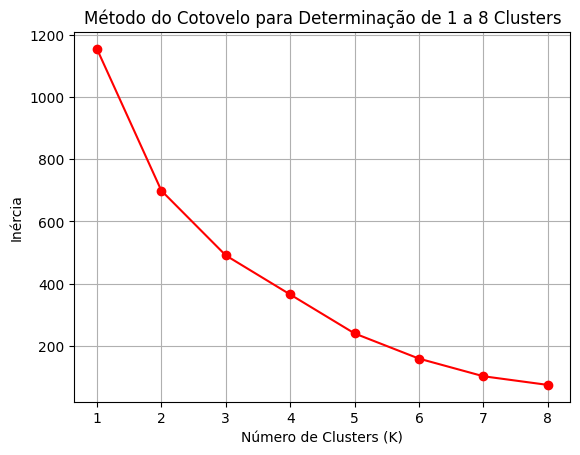

In [156]:
# Lista para armazenar a inércia
inertia = []

# Testando de 1 a 8 clusters
for n_clusters in range(1, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_normalizados)  # Ajustando o modelo K-means aos dados normalizados
    inertia.append(kmeans.inertia_)  # Adicionando a inércia à lista

# Plotando o gráfico do cotovelo
plt.plot(range(1, 9), inertia, marker='o', linestyle='-', color='red')
plt.title('Método do Cotovelo para Determinação de 1 a 8 Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.xticks(range(1, 9))
plt.grid(True)
plt.show()

Gráfico da silhueta

Silhueta média para n_clusters=8: 0.665


c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


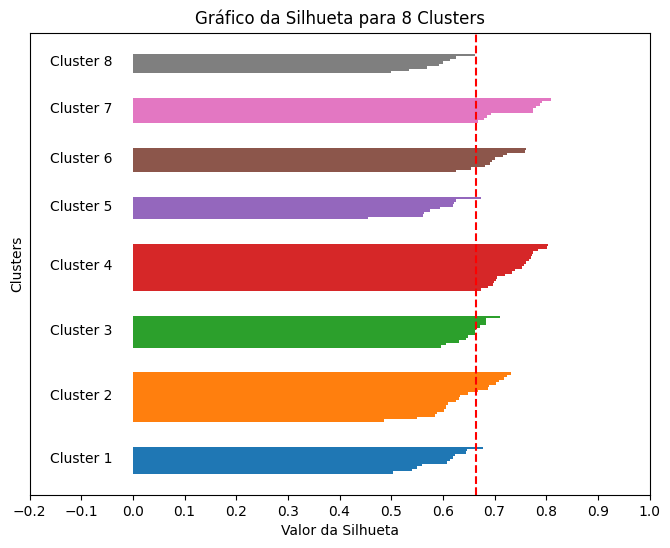

In [173]:
# Número de clusters (por exemplo, 8 clusters)
n_clusters = 8

# Aplicando o K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_normalizados)

# Calculando o valor da silhueta
silhouette_vals = silhouette_samples(df_normalizados, cluster_labels)

# Calculando o valor médio da silhueta
silhouette_avg = silhouette_score(df_normalizados, cluster_labels)
print(f"Silhueta média para n_clusters={n_clusters}: {silhouette_avg:.3f}")

# Plotando o gráfico da silhueta
fig, ax = plt.subplots(figsize=(8, 6))

# Para cada cluster, vamos plotar os valores de silhueta
y_lower = 10  # Distância entre as barras para visualização
for i in range(n_clusters):
    # Obtendo os valores de silhueta para o cluster i
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]

    # Ordenando os valores de silhueta do cluster i
    cluster_silhouette_vals.sort()

    # Calculando o topo da barra
    size_cluster = len(cluster_silhouette_vals)
    y_upper = y_lower + size_cluster

    # Plotando o gráfico de barras
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, edgecolor='none')

    # Adicionando uma linha vertical para separar os clusters
    ax.text(-0.10, (y_lower + y_upper) / 2, f'Cluster {i+1}', ha='center', va='center', fontsize=10)

    # Atualizando o valor de y_lower para o próximo cluster
    y_lower = y_upper + 10

# Linha vertical representando o valor médio da silhueta
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Títulos e rótulos
ax.set_title(f"Gráfico da Silhueta para {n_clusters} Clusters")
ax.set_xlabel("Valor da Silhueta")
ax.set_ylabel("Clusters")
ax.set_yticks([])  # Removendo as marcas do eixo y
ax.set_xticks([i/10.0 for i in range(-2, 11)])

plt.show()


Clusters formados

2D

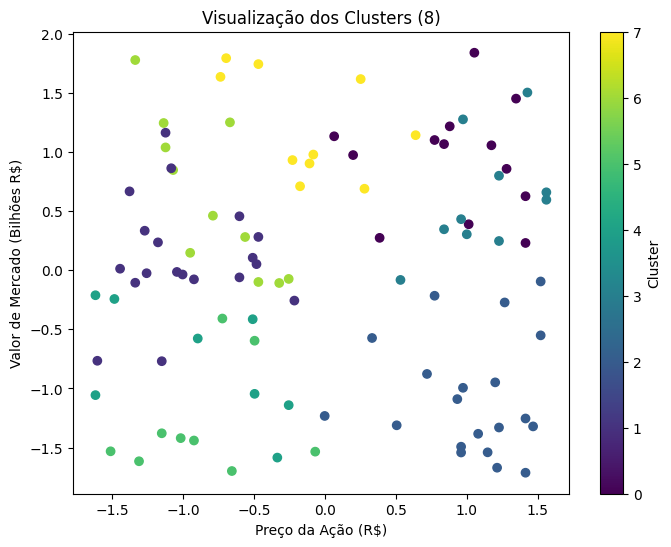

In [158]:
# Visualizando os clusters em um gráfico (Preço da Ação vs Valor de Mercado)
plt.figure(figsize=(8, 6))

# Plotando o gráfico de dispersão com base nas duas variáveis
plt.scatter(df_normalizados['preço ação R$'], df_normalizados['valor de mercado R$ -(Bilhões)'],
            c=df_normalizados['cluster_8'], cmap='viridis')

# Títulos e rótulos
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões R$)')
plt.title(f'Visualização dos Clusters (8)')

# Adicionando a barra de cores para identificar os clusters
plt.colorbar(label='Cluster')

# Exibindo o gráfico
plt.show()


3D

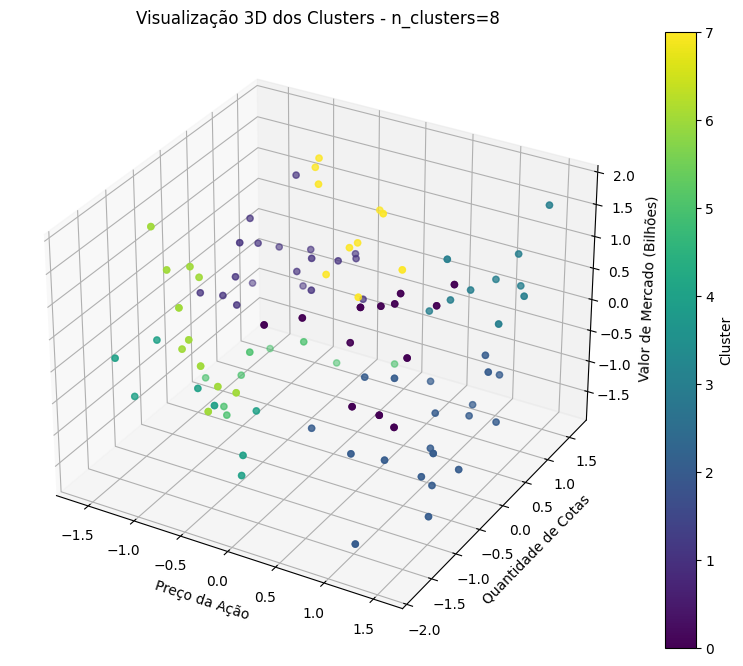

In [174]:
# Visualizando os clusters em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando o gráfico de dispersão 3D
ax.scatter(df_normalizados['preço ação R$'], 
           df_normalizados['qtde cotas'], 
           df_normalizados['valor de mercado R$ -(Bilhões)'],
           c=df_normalizados['cluster_8'], cmap='viridis')

# Títulos e rótulos dos eixos
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')
ax.set_title(f'Visualização 3D dos Clusters - n_clusters=8')

# Adicionando a barra de cores para identificar os clusters
cbar = plt.colorbar(ax.scatter(df_normalizados['preço ação R$'],
                                df_normalizados['qtde cotas'], 
                                df_normalizados['valor de mercado R$ -(Bilhões)'],
                                c=df_normalizados['cluster_8'], cmap='viridis'))
cbar.set_label('Cluster')

# Exibindo o gráfico
plt.show()


Aprendizado não supervisionado x aprendizado supervisionado

A maior vantagem do aprendizado não supervisionado para o aprendizado supervisionado é o fato de não precisar de rótulos, que são respostas associadas a cada entrada nos dados, são usados no aprendizado supervisionado para ensinar o modelo a fazer previsões. Por não precisar disso, o modelo tenta encontrar padrões ou agrupamentos nos dados por conta própria no aprendizado não supervisionado.